In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install tensorflow

In [ ]:
# Step 1: Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Step 2: Preprocess the data
# Normalize the pixel values from 0-255 to 0-1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data to fit into the network (28x28 images -> flattened into 784 input features)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# One-hot encode the labels (output classes are 0-9)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# Step 3: Build the neural network
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))  # Hidden layer with 512 units
model.add(layers.Dropout(0.2))  # Dropout to prevent overfitting
model.add(layers.Dense(256, activation='relu'))  # Another hidden layer
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 units (for digit classification)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Step 5: Train the model and save the history
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8350 - loss: 0.5520 - val_accuracy: 0.9616 - val_loss: 0.1256
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9629 - loss: 0.1207 - val_accuracy: 0.9687 - val_loss: 0.1013
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9756 - loss: 0.0789 - val_accuracy: 0.9722 - val_loss: 0.0902
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9804 - loss: 0.0616 - val_accuracy: 0.9724 - val_loss: 0.0869
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9841 - loss: 0.0501 - val_accuracy: 0.9761 - val_loss: 0.0820
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9878 - loss: 0.0398 - val_accuracy: 0.9781 - val_loss: 0.0785
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9894 - loss: 0.0333 - val_accuracy: 0.9790 - val_loss: 0.0793
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9898 - loss: 0.0299 - val_acc

In [ ]:
# Step 6: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9759 - loss: 0.0911
Test accuracy: 0.9782000184059143


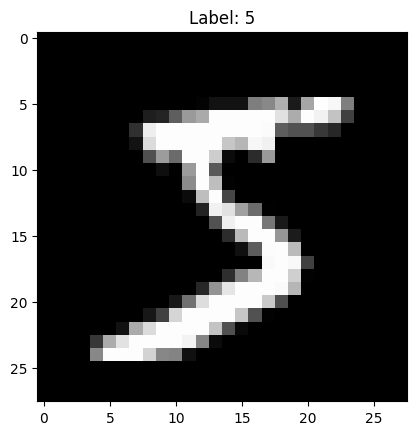

In [ ]:
import matplotlib.pyplot as plt

# Visualize the first image in the training dataset
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')  # Reshape back to 28x28
plt.title(f"Label: {np.argmax(y_train[0])}")  # Display the corresponding label
plt.show()


In [ ]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,607,456 (6.13 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,071,638 (4.09 MB)

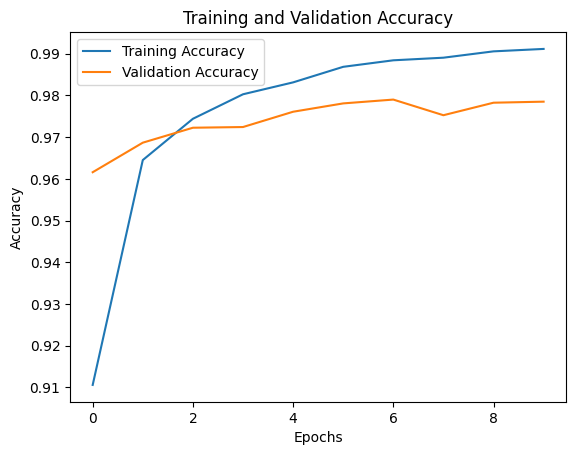

In [ ]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


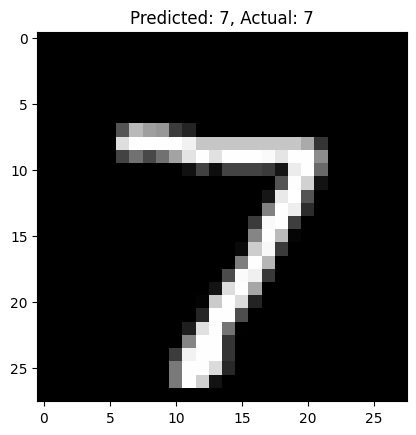

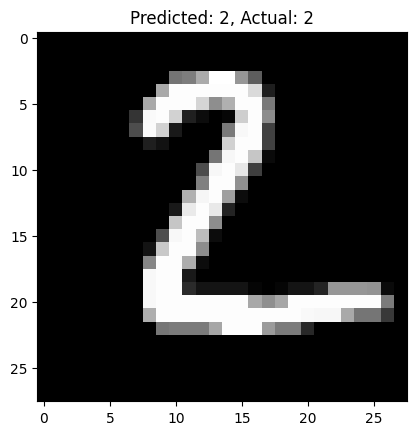

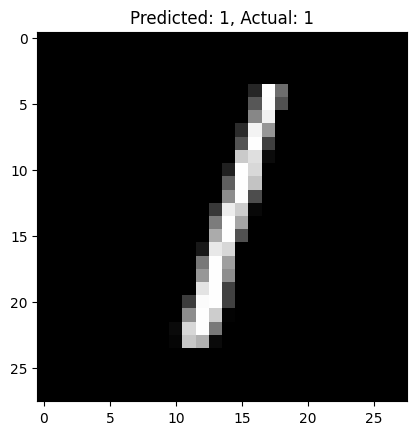

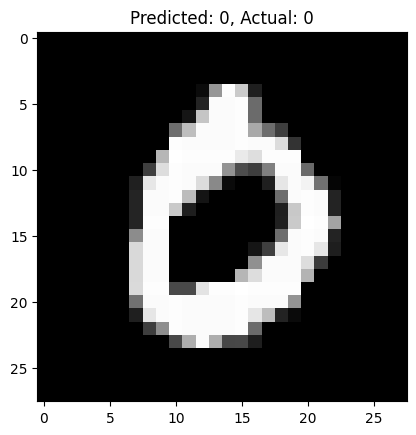

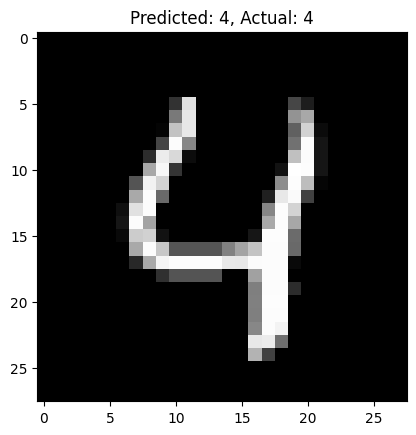

In [ ]:
# Predict the first 5 test images
predictions = model.predict(x_test[:5])

# Visualize the predictions along with the actual labels
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Reshape to display as 28x28 image
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test[i])}")
    plt.show()


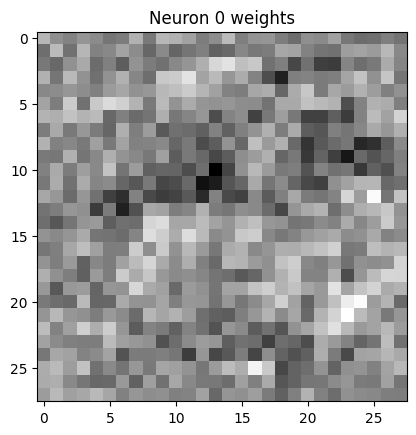

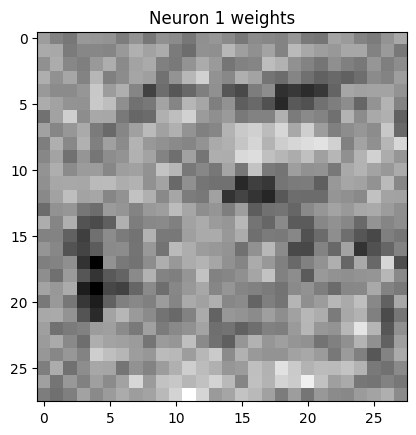

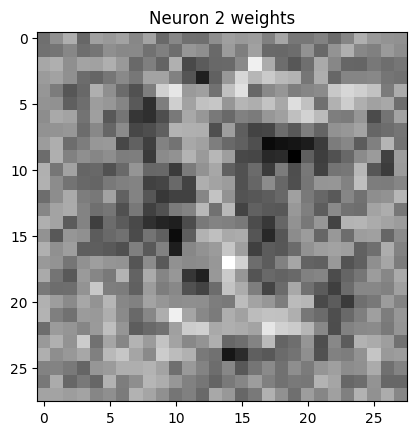

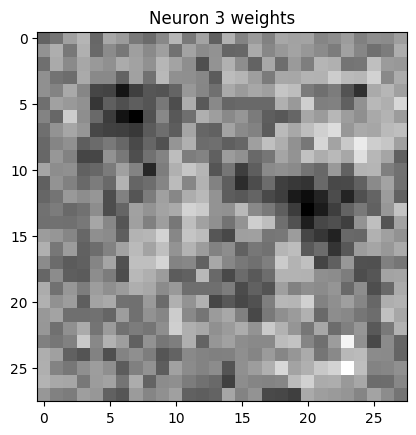

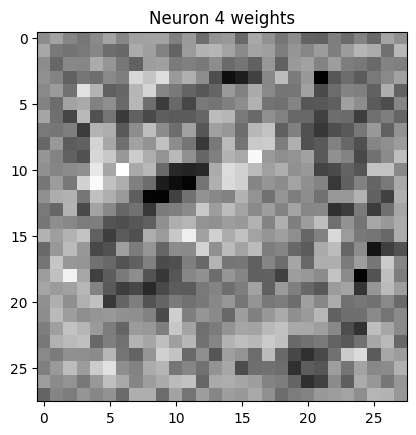

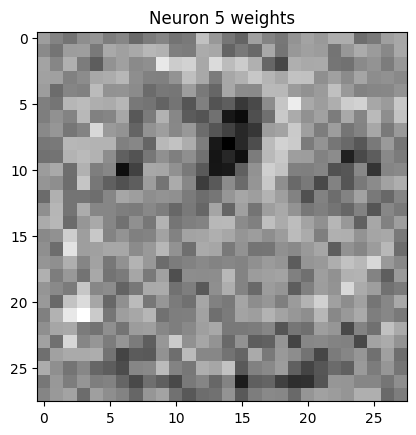

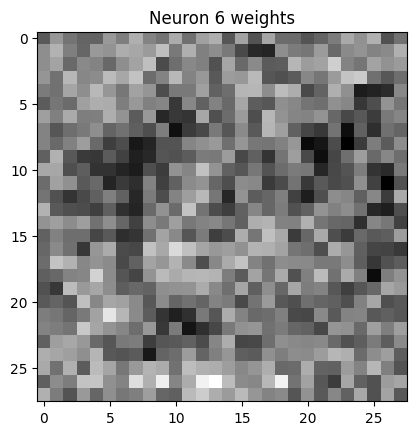

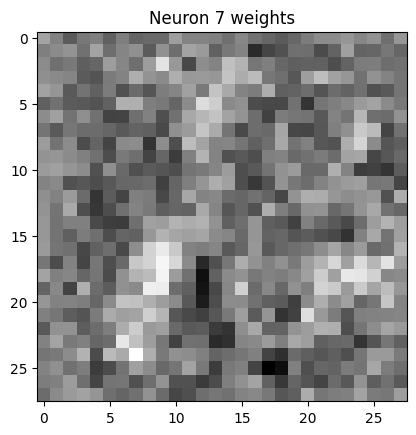

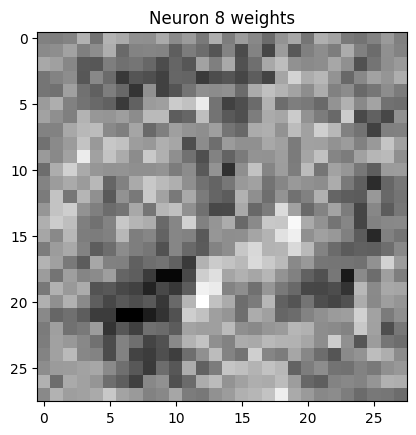

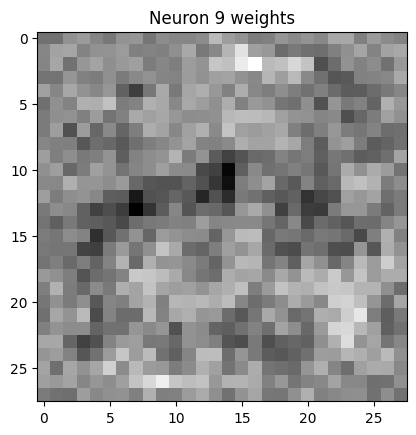

In [ ]:
# Get weights from the first dense layer
weights, biases = model.layers[0].get_weights()

# Visualize the weights of the first 10 neurons
for i in range(10):
    plt.imshow(weights[:, i].reshape(28, 28), cmap='gray')
    plt.title(f'Neuron {i} weights')
    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


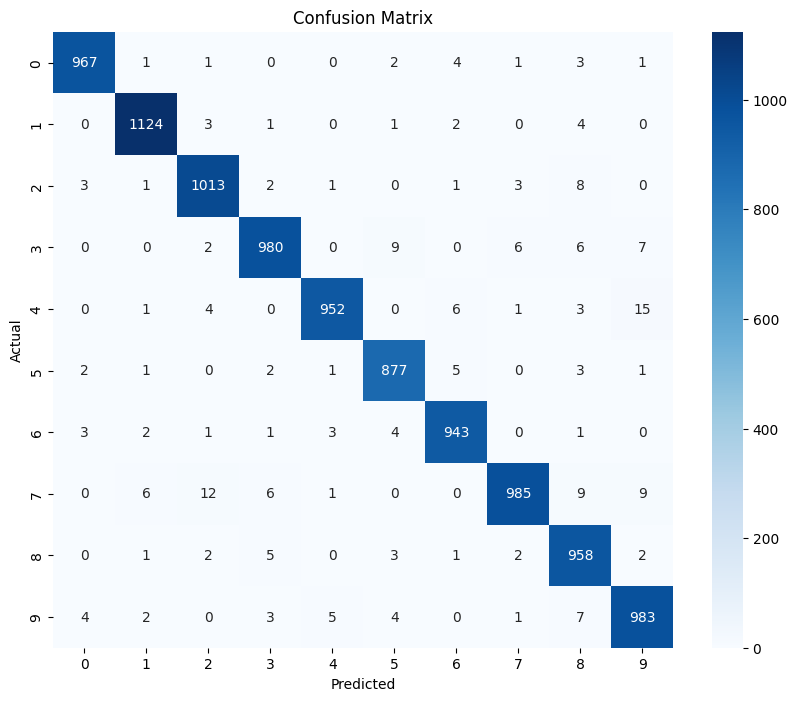

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict all test images
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
